<a href="https://colab.research.google.com/github/sathikrishnapriya/project/blob/main/stresslevelprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import mode

In [ ]:
import warnings
warnings.filterwarnings('ignore')
dataset_path = '/content/StressLevelDataset.csv'
encodings_to_try = ['utf-8', 'utf-8-sig', 'latin-1', 'ISO-8859-1', 'cp1252', 'utf-16']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(dataset_path, encoding=encoding)
        break
    except UnicodeDecodeError:
        pass
df


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [ ]:

print(df.dtypes)


anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


In [7]:
print(df.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2        

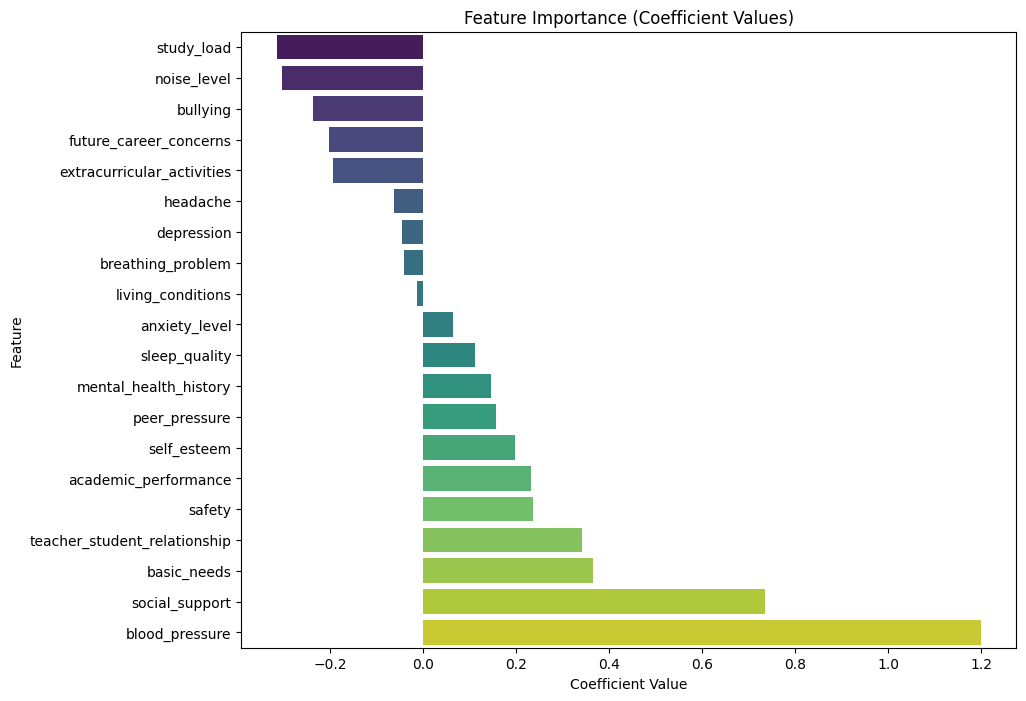

In [21]:
coefficients = model.coef_[0]
features_coefficients = pd.Series(coefficients, index=features).sort_values()
plt.figure(figsize=(10, 8))
sns.barplot(x=features_coefficients, y=features_coefficients.index, palette='viridis')
plt.title('Feature Importance (Coefficient Values)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

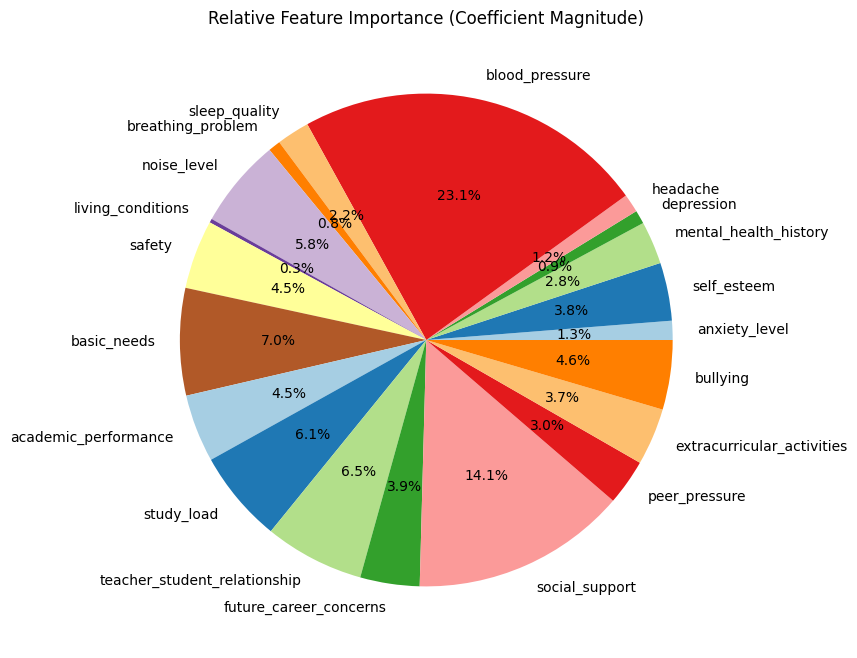

In [23]:
coefficients = model.coef_[0]
abs_coefficients = np.abs(coefficients)  # Take the absolute value of coefficients
plt.figure(figsize=(10, 8))
plt.pie(abs_coefficients, labels=features, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Relative Feature Importance (Coefficient Magnitude)')
plt.show()

In [8]:
# Define the feature columns and target column
features = ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
            'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
            'noise_level', 'living_conditions', 'safety', 'basic_needs',
            'academic_performance', 'study_load', 'teacher_student_relationship',
            'future_career_concerns', 'social_support', 'peer_pressure',
            'extracurricular_activities', 'bullying']
target = 'stress_level'


In [10]:
X = df[features]
y = df[target]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.00%


In [17]:
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       113
           1       0.89      0.91      0.90       107
           2       0.91      0.91      0.91       110

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [18]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[100   6   7]
 [  7  97   3]
 [  4   6 100]]
